# **Group Details**

**Group ID:** 229

**Members & ID:**
 - Anil Krishna Chintapalli (2020fc04313)
 -  Rajkumar S (2020fc04309)
 -  Swathy R (2020fc04308)


 **Assignment Problem Statement 5:**

Dataset - http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html 
The motive of the assignment is to identify whether a person is wearing Eyeglasses, wearing a hat and has a mustache or not. CelebFaces Attributes Dataset (CelebA) is a large-scale face attributes dataset with more than 200K celebrity images, each with 40 attribute annotations. The images in this dataset cover large pose variations and background clutter. CelebA has large diversities, large quantities, and rich annotations, including
-	10,177 number of identities,
-	202,599 number of face images, and
-	5 landmark locations, 40 binary attributes annotations per image.


# Project Overview

* The first step is to download the dataset and import required libraries.
* The images are preprocessed and split into train and test data set
* Next step is to define the model architecture which includes the number of hidden layers, activation function and so on
* The Model is trained on the training data set. We also pass the validation images to validate how well the model performs
* Finally, we use the trained model to get predictions on new images



## Importing the following libraries for model building 
1. cv2 - Open CV Library for actions and operations on image
2. glob - To list files in directory
3. Pandas - To store and manipulate data
4. keras - 
    a. models.Sequential - To create a Neural Network model of Sequential type
    b. layers - Different types of layers for the Neural Network. For CNN, we use Convlotuion, MaxPool, Flatten, Dense, Dropout layers. Explanation for each is given in the code.
5. tensorflow.keras - 
    a. optimizers.Adam - Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments.
    b. preprocessing.image - For pre-processing of images
6. sklearn.model_selection - Importing train_test_split for creation training and testing data subests out of the dataset.
7. seaborn - For visualizing data
8. numpy - For data manipulation
9. tqdm - For visualization of loops.

In [218]:
import cv2, glob
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np
import tqdm
from sklearn.metrics import confusion_matrix

## **Data Visualization and Exploration**

In [2]:
# Fetching the image list 

images = glob.glob("./img_align_celeba/*.jpg")
print(f"Total number of images: {len(images)}")

Total number of images: 202599


##### As the per project requirement, we only read three attributes - Mustache, Eyeglasses, Wearing_Hat attributes from the attributes

In [3]:
# Reading the list_attr_celeba.txt file which contains attribute labels for images in the dataset.

attrs = pd.read_csv("./list_attr_celeba.txt", delim_whitespace = True, skiprows=1, usecols=['Mustache', 'Eyeglasses', 'Wearing_Hat'])
print("Sample Attribute List:- ")
print(attrs.head())
print(f"Total Count of attributes: {attrs.shape}")

Sample Attribute List:- 
            Eyeglasses  Mustache  Wearing_Hat
000001.jpg          -1        -1           -1
000002.jpg          -1        -1           -1
000003.jpg          -1        -1           -1
000004.jpg          -1        -1           -1
000005.jpg          -1        -1           -1
Total Count of attributes: (202599, 3)


In [4]:
# Renaming the columns for ease of access 

attrs.rename(columns={"Mustache": "M", "Eyeglasses": "G", "Wearing_Hat": "H"}, inplace=True)

In [5]:
# Class division

print(f"Number of images with Hat: {attrs[attrs['H'] == 1].shape[0]}, Number of images with Moustache: {attrs[attrs['M'] == 1].shape[0]}, Number of images with Eyeglassess: {attrs[attrs['G'] == 1].shape[0]}")

Number of images with Hat: 9818, Number of images with Moustache: 8417, Number of images with Eyeglassess: 13193


In [6]:
# Defining get_image() method that reads the image as an array and disp_image() to plot and display image.

image_path = "./img_align_celeba/"
def get_image(image_name):
    image_name_with_path = None
    if image_path not in image_name: 
        image_name_with_path = image_path + image_name
    else:
        image_name_with_path = image_name
    i = cv2.imread(image_name_with_path, 1)
    return i

def disp_image(image_name, title=""):
    plt.imshow(cv2.cvtColor(get_image(image_name), cv2.COLOR_BGR2RGB))
    plt.title = title
    print(plt.title)
    plt.show()
    plt.close()

Eye Glasses


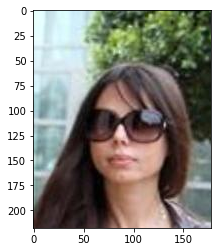

Hat


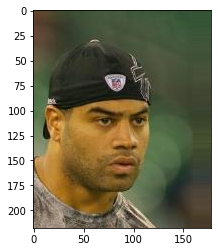

Mustache


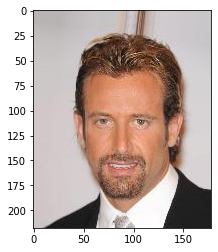

(None, None, None)

In [7]:
# Displaying sample images for all the combinations using disp_image() function created above

disp_image(attrs[attrs["G"] == 1].iloc[1].name, "Eye Glasses"), disp_image(attrs[attrs["H"] == 1].iloc[0].name, "Hat"), disp_image(attrs[attrs["M"] == 1].iloc[0].name, "Mustache")

In [8]:
# Displaying image size

print(f"Image size: {get_image(attrs.iloc[0].name).shape}")

Image size: (218, 178, 3)


Text(0, 0.5, 'Percentage')

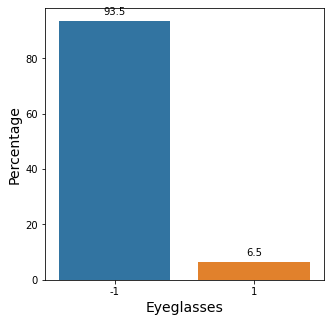

In [9]:
plt.figure(figsize=(5, 5))
fig = sns.barplot(x=attrs['G'], y=attrs['G'], data=attrs, estimator=lambda x: len(x) / len(attrs) * 100)
for p in fig.patches:
    fig.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Eyeglasses", size=14)
plt.ylabel("Percentage", size=14)

Text(0, 0.5, 'Percentage')

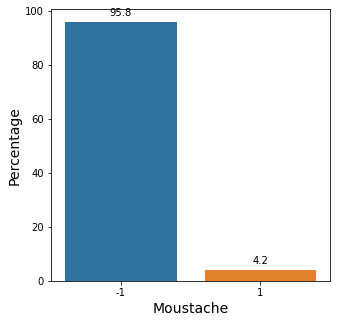

In [10]:
plt.figure(figsize=(5, 5))
fig = sns.barplot(x=attrs['M'], y=attrs['M'], data=attrs, estimator=lambda x: len(x) / len(attrs) * 100)
for p in fig.patches:
    fig.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Moustache", size=14)
plt.ylabel("Percentage", size=14)

Text(0, 0.5, 'Percentage')

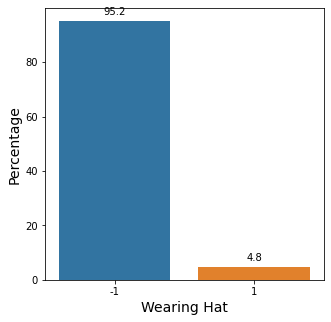

In [11]:
plt.figure(figsize=(5, 5))
fig = sns.barplot(x=attrs['H'], y=attrs['H'], data=attrs, estimator=lambda x: len(x) / len(attrs) * 100)
for p in fig.patches:
    fig.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("Wearing Hat", size=14)
plt.ylabel("Percentage", size=14)

##### As observed in the plot above, the data is unbalanced. We have only 6.5% of images containing Eyeglasses, 4.2% images containing Moustache and 4.8% images containing Hat. <br>

## Data Preprocessing and Cleaning
##### To accommodate compute power and address class imbalance, we consider all the images with atleast one of the required attribute and additional 10000 images with no attribute being satisified.

In [12]:
final_labels_1 = pd.concat([attrs.query("(H  == 1) or (M == 1)  or (G == 1)"), attrs.query("(H  != 1) and (M != 1) and (G != 1)").sample(n=10000)])
final_labels = final_labels_1

# Replacing -1 with 0
final_labels.replace(-1, 0, inplace=True)

Normalization technique is used to preprocess the image and later convert it into a numpy array

In [13]:
# Converting the images into 3D arrays with x axis as width, y axis as height and z axis as RGB values for each pixel
# Using img_to_array() method to get the array and normalizing the pixel values to lie bewteen [0,1] .
# As all the pixel values would be in range of 0-255, we divide each value with 255 to get a fraction value between 0 and 1 (inclusive)

images_data = []
for i in tqdm.tqdm(range(len(final_labels))):
    img = image.load_img("{}/{}".format(image_path, final_labels.iloc[i].name))
    img = image.img_to_array(img)
    img = img/255
    images_data.append(img)

# Converting array to nparray
images_data_np = np.asarray(images_data) 

100%|██████████| 37719/37719 [01:22<00:00, 456.49it/s]


In [14]:
# Printing the final shape of image dataset and labels

images_data_np.shape, final_labels.shape

((37719, 218, 178, 3), (37719, 3))

In [15]:
# Sample Data

images_data_np[0][0][0], final_labels.head()

(array([0.4       , 0.27450982, 0.19215687], dtype=float32),
             G  M  H
 000037.jpg  0  0  1
 000053.jpg  1  0  0
 000068.jpg  0  0  1
 000074.jpg  0  0  1
 000093.jpg  1  0  0)

## Data Preparation

##### Using train_test_split() method to generate training and testing data subsets for the model.

In [16]:
# Splitting the dataset in 75:25 ratio for training and testing the model using train_test_split function from sklearn.

x_train, x_test, y_train, y_test = train_test_split(images_data_np, final_labels, test_size=0.25, random_state=42)

## CNN Model

### Sample CNN Architecture
<img src="sample_cnn.png"/>

<br>
Each image can have a single feature (object) or multiple features. An image might contain only Eyeglasses or hat or have a combination of all three.Each image here belongs to more than one class and hence it is a <b>Multi-Label Image Classification problem</b>.

### Basic Model
We start by creating a Sequential Model for the CNN. <br>
### Layers
#### Convolution Layers
We chose 5 sets of layers - Each having a Convolution Layer and MaxPooling Layer. <br>
The filter size is set to (3,3) and pooling function is MaxPooling with (2,2) size. <br>
Activation function for the convolution layers is <b>Rectified Linear Unit (ReLU)</b> where negative values are considered as 0 and positive values as themselves. {x: x<0 -> 0 | x>0 -> x}<br>
#### Flatten and Dense Layers
At the end, the final output of Convolution is Flattened to a vector and fed to Dense layer of size 512 where the layers are fully connected. <br>
#### Dropout
As the model was suffering from <b>Overfitting</b>, we added a Dropout layer with 20% dropout percentage for regularization. <br>
#### Output Layer
The output layer has 3 output neurons each for Hat, Moustache and EyeGlassess as output. The activation function used is <b>Sigmoid</b> function so as to obtain values between 0 to 1.

In [17]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=get_image(attrs.iloc[0].name).shape))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 216, 176, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 108, 88, 16)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 106, 86, 32)       4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 43, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 51, 41, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 20, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 18, 64)        3

#### Loss Function and Optimizer 
As the attempted classification is Multi Label Classification with binary outputs for each label, the loss function used is <b>binary_crossentropy</b>. <br>
Upon evaluating multiple optimizers, the optimizer that fit best for this scenario is <b>Adam</b> optimizer. <br>
We set the learning rate as <b>10e-4</b>.

In [18]:
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics='accuracy')

In [19]:
# The model is now trained on the training data, for 30 epochs and batch size = 4.

model.fit(
x_train, y_train, epochs=30,validation_data=(x_test, y_test), batch_size=4
)

Epoch 1/30
7073/7073 [==============================] - 506s 71ms/step - loss: 0.2381 - accuracy: 0.6939 - val_loss: 0.1709 - val_accuracy: 0.6953
Epoch 2/30
7073/7073 [==============================] - 484s 68ms/step - loss: 0.1504 - accuracy: 0.7086 - val_loss: 0.1410 - val_accuracy: 0.7067
Epoch 3/30
7073/7073 [==============================] - 486s 69ms/step - loss: 0.1279 - accuracy: 0.7212 - val_loss: 0.1303 - val_accuracy: 0.6905
Epoch 4/30
7073/7073 [==============================] - 485s 69ms/step - loss: 0.1153 - accuracy: 0.7196 - val_loss: 0.1228 - val_accuracy: 0.7341
Epoch 5/30
7073/7073 [==============================] - 496s 70ms/step - loss: 0.1057 - accuracy: 0.7309 - val_loss: 0.1232 - val_accuracy: 0.7018
Epoch 6/30
7073/7073 [==============================] - 561s 79ms/step - loss: 0.0972 - accuracy: 0.7390 - val_loss: 0.1144 - val_accuracy: 0.7537
Epoch 7/30
7073/7073 [==============================] - 562s 79ms/step - loss: 0.0884 - accuracy: 0.7406 - val_loss: 0

### The model after 30 epochs has an accuracy of 78.36% against the validation_data and 71.11% validation accuracy. The loss obtained using the binary_crossentropy is 1%.

EyeGlasses: 2.851843201677186e-14, Mustache: 0.0018245544197270647, Hat: 99.99895095825195



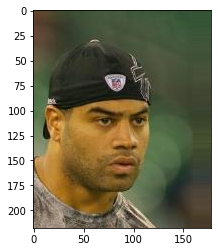

In [24]:
# Method to predict the attributes of the image and subsequently display it for verification.

def predict_image(image_pred_name):
    img = image.load_img(image_pred_name)
    img = image.img_to_array(img)
    img = img/255
    predictions = model.predict(np.asarray([img]))
    print(f"EyeGlasses: {predictions[0][0]*100}, Mustache: {predictions[0][1]*100}, Hat: {predictions[0][2]*100}")
    disp_image(image_pred_name)


In [21]:
# Saving model

import pickle
model.save("./model_final", include_optimizer =True)

INFO:tensorflow:Assets written to: ./model_final/assets


### The two other models that were evaluated as part of the project fetched comparitively less accuracy. Due to constraint of less computational power and huge volume of data, metrics for those models could not be added as part of this notebook.

#### CNN Multilabel Classification with Optimizer as SGD, no Dropout layer and Dense layer with 1024 nodes. 

In [216]:
model2 = Sequential()
model2.add(Conv2D(16, (3,3), activation='relu', input_shape=get_image(attrs.iloc[0].name).shape))
model2.add(MaxPool2D(2,2))
model2.add(Conv2D(32, (3,3), activation='relu'))
model2.add(MaxPool2D(2,2))
model2.add(Conv2D(64, (3,3), activation='relu'))
model2.add(MaxPool2D(2,2))
model2.add(Conv2D(64, (3,3), activation='relu'))
model2.add(MaxPool2D(2,2))
model2.add(Conv2D(64, (3,3), activation='relu'))
model2.add(MaxPool2D(2,2))
model2.add(Flatten())
model2.add(Dense(1024, activation='relu'))
model2.add(Dense(3, activation='sigmoid'))
model2.summary()
model2.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=0.0001), metrics='accuracy')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 216, 176, 16)      448       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 108, 88, 16)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 106, 86, 32)       4640      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 53, 43, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 51, 41, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 25, 20, 64)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 23, 18, 64)       

#### CNN Multilabel Classification with Optimizer as RMSprop, loss as MSE, no Dropout layer and Dense layer with 1024 nodes. 

In [220]:
model2 = Sequential()
model2.add(Conv2D(16, (3,3), activation='relu', input_shape=get_image(attrs.iloc[0].name).shape))
model2.add(MaxPool2D(2,2))
model2.add(Conv2D(32, (3,3), activation='relu'))
model2.add(MaxPool2D(2,2))
model2.add(Conv2D(64, (3,3), activation='relu'))
model2.add(MaxPool2D(2,2))
model2.add(Conv2D(64, (3,3), activation='relu'))
model2.add(MaxPool2D(2,2))
model2.add(Conv2D(64, (3,3), activation='relu'))
model2.add(MaxPool2D(2,2))
model2.add(Flatten())
model2.add(Dense(1024, activation='relu'))
model2.add(Dense(3, activation='sigmoid'))
model2.summary()
model2.compile(loss='mean_squared_error', optimizer=RMSprop(learning_rate=0.0001), metrics='accuracy')

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 216, 176, 16)      448       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 108, 88, 16)       0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 106, 86, 32)       4640      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 53, 43, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 51, 41, 64)        18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 25, 20, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 23, 18, 64)       

## Best Model Evaluation

predict_image() function to print the output of the model along with the image for verification.

EyeGlasses: 100.0, Mustache: 0.0016736379620851949, Hat: 0.005844317638548091



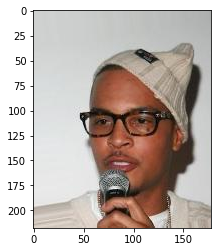

In [153]:
# Sample image with only Glasses

predict_image("./img_align_celeba/193290.jpg")

EyeGlasses: 7.034717814787821e-16, Mustache: 6.279933372934415e-15, Hat: 100.0



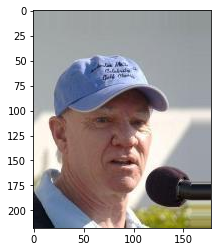

In [147]:
# Sample image with only Hat

predict_image("./img_align_celeba/199626.jpg")

EyeGlasses: 5.559647455410065e-12, Mustache: 99.79836940765381, Hat: 8.2490350905573e-05



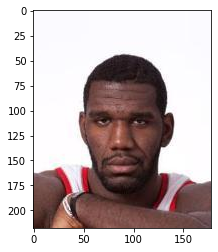

In [149]:
# Sample image with only Moustache

predict_image("./img_align_celeba/105622.jpg")

EyeGlasses: 1.510116618419488e-05, Mustache: 1.0514187151740924e-13, Hat: 0.0002286986500621424



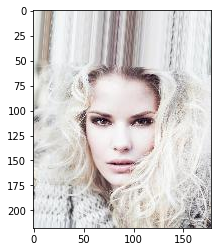

In [109]:
# Sample image with no attributes

predict_image("./img_align_celeba/123090.jpg")

EyeGlasses: 100.0, Mustache: 0.0006315168320725206, Hat: 99.96792078018188



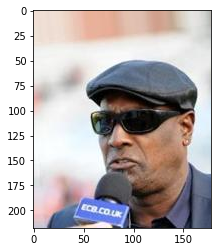

In [141]:
# Sample image with Hat and Glasses

predict_image("./img_align_celeba/200277.jpg")

EyeGlasses: 100.0, Mustache: 87.9595398902893, Hat: 100.0



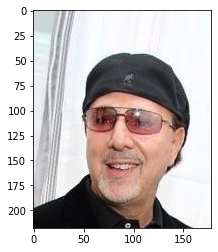

In [145]:
# Sample image with all attributes

predict_image("./img_align_celeba/038901.jpg")

In [174]:
# Predicting on the test data test and building confusion matrix

y_pred_test = model.predict(x_test)
print("Predicted values")

Predicted values


In [179]:
# Confusion Matrix for all three attributes
from sklearn.metrics import multilabel_confusion_matrix

pred_test = np.asarray([[int(i[0]/0.8), int(i[1]/0.8), int(i[2]/0.8)] for i in y_pred_test])
confusion_matrix = multilabel_confusion_matrix(y_test, pred_test)
confusion_matrix

array([[[6081,   31],
        [ 166, 3152]],

       [[6975,  354],
        [ 531, 1570]],

       [[6850,  141],
        [ 158, 2281]]])

[[6081   31]
 [ 166 3152]]


<AxesSubplot:>

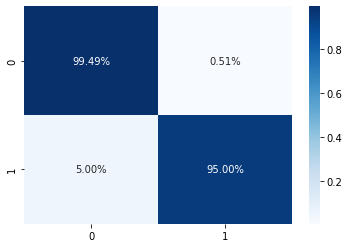

In [208]:
# Confusion Matrix for Hat

cf_matrix = confusion_matrix[0]
print(cf_matrix)
cf_matrix_f = [[0,0], [0,0]]
cf_matrix_f[0][0] = cf_matrix[0][0]/(cf_matrix[0][0]+cf_matrix[0][1])
cf_matrix_f[0][1] = cf_matrix[0][1]/(cf_matrix[0][0]+cf_matrix[0][1])
cf_matrix_f[1][0] = cf_matrix[1][0]/(cf_matrix[1][0]+cf_matrix[1][1])
cf_matrix_f[1][1] = cf_matrix[1][1]/(cf_matrix[1][0]+cf_matrix[1][1])
sns.heatmap(cf_matrix_f, annot=True, 
            fmt='.2%', cmap='Blues')

[[6975  354]
 [ 531 1570]]


<AxesSubplot:>

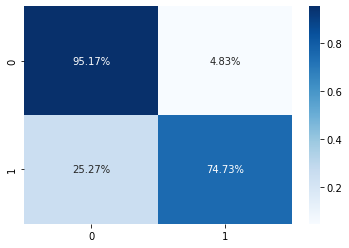

In [209]:
# Confusion Matrix for Glasses

cf_matrix = confusion_matrix[1]
print(cf_matrix)
cf_matrix_f = [[0,0], [0,0]]
cf_matrix_f[0][0] = cf_matrix[0][0]/(cf_matrix[0][0]+cf_matrix[0][1])
cf_matrix_f[0][1] = cf_matrix[0][1]/(cf_matrix[0][0]+cf_matrix[0][1])
cf_matrix_f[1][0] = cf_matrix[1][0]/(cf_matrix[1][0]+cf_matrix[1][1])
cf_matrix_f[1][1] = cf_matrix[1][1]/(cf_matrix[1][0]+cf_matrix[1][1])
sns.heatmap(cf_matrix_f, annot=True, 
            fmt='.2%', cmap='Blues')

[[6850  141]
 [ 158 2281]]


<AxesSubplot:>

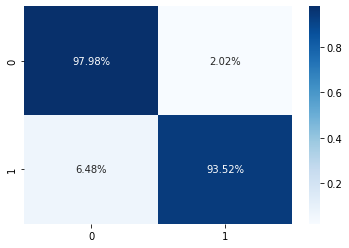

In [210]:
# Confusion Matrix for Moustache

cf_matrix = confusion_matrix[2]
print(cf_matrix)
cf_matrix_f = [[0,0], [0,0]]
cf_matrix_f[0][0] = cf_matrix[0][0]/(cf_matrix[0][0]+cf_matrix[0][1])
cf_matrix_f[0][1] = cf_matrix[0][1]/(cf_matrix[0][0]+cf_matrix[0][1])
cf_matrix_f[1][0] = cf_matrix[1][0]/(cf_matrix[1][0]+cf_matrix[1][1])
cf_matrix_f[1][1] = cf_matrix[1][1]/(cf_matrix[1][0]+cf_matrix[1][1])
sns.heatmap(cf_matrix_f, annot=True, 
            fmt='.2%', cmap='Blues')

In [101]:
metrics = model.evaluate(x_train, y_train)
print("Evaluation Metrics for training dataset.")
print(metrics)
metrics = model.evaluate(x_test, y_test)
print("Evaluation Metrics for testing dataset.")
print(metrics)

885/885 [==============================] - 109s 123ms/step - loss: 0.0086 - accuracy: 0.7260
Evaluation Metrics for training dataset.
[0.008570974692702293, 0.7259712219238281]
295/295 [==============================] - 40s 134ms/step - loss: 0.3151 - accuracy: 0.7111
Evaluation Metrics for testing dataset.
[0.3150954246520996, 0.711134672164917]


From the metrics, the best accuracy is being obtained from the model for Glasses and Moustache.